In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(6,4))

In [3]:
# load as Pandas dataframe
login_df = pd.read_json('logins.json')
login_df.head()
login_df.shape

(93142, 1)

In [4]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [6]:
login_df.shape

(93142, 1)

PART ONE
 Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [7]:
type(login_df['login_time'][0])

pandas._libs.tslib.Timestamp

In [8]:
# Create intervals
intervals = pd.date_range(start='1970-01-01 20:00:00',end='1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(intervals)),index= intervals)
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [9]:
login_df = login_df.sort_values('login_time')
login_df = login_df.reset_index(drop=True)
login_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [10]:
k=0
for i in range(len(login_df)):
    s = ts.index[k]
    e = ts.index[k+1]
    t = login_df['login_time'][i]
    if s < t < e:
        ts[k] = ts[k] + 1
    else:
        while(e < t):
            k = k + 1
            s = ts.index[k]
            e = ts.index[k+1]
        ts[k] = ts[k] + 1
    
                
                

In [11]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

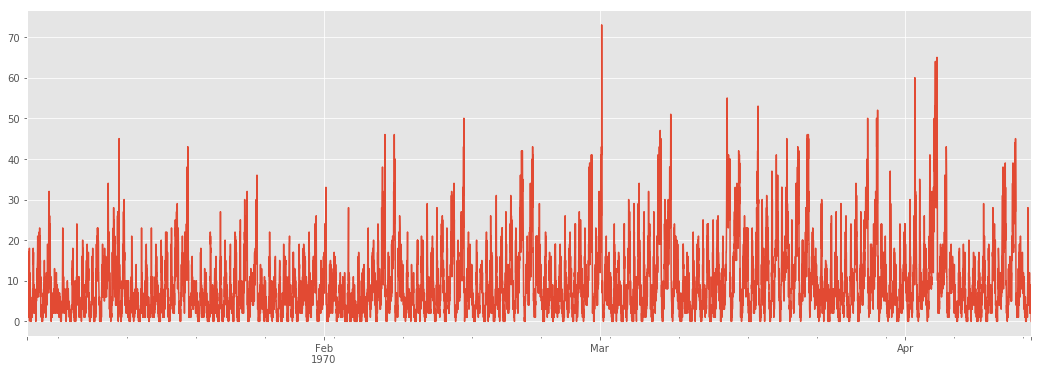

In [12]:
# Plot all data
plt.figure(figsize = (18,6))
ts.plot()

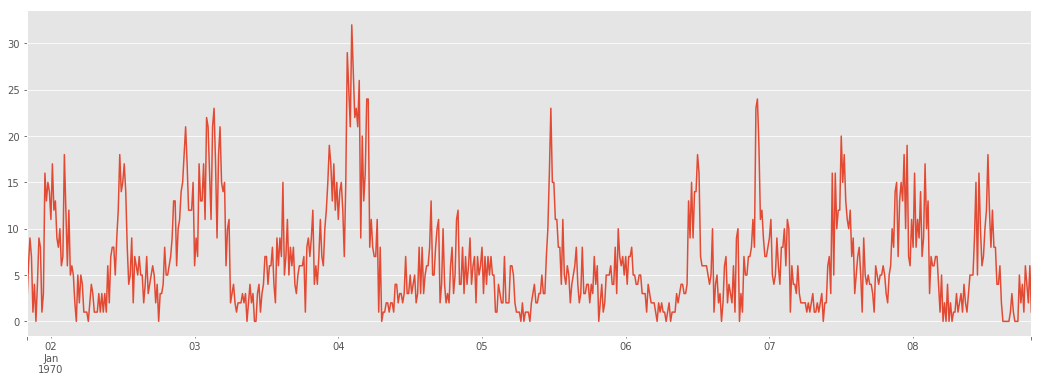

In [13]:
# Plot one week's data
plt.figure(figsize = (18,6))
ts[0:672].plot()

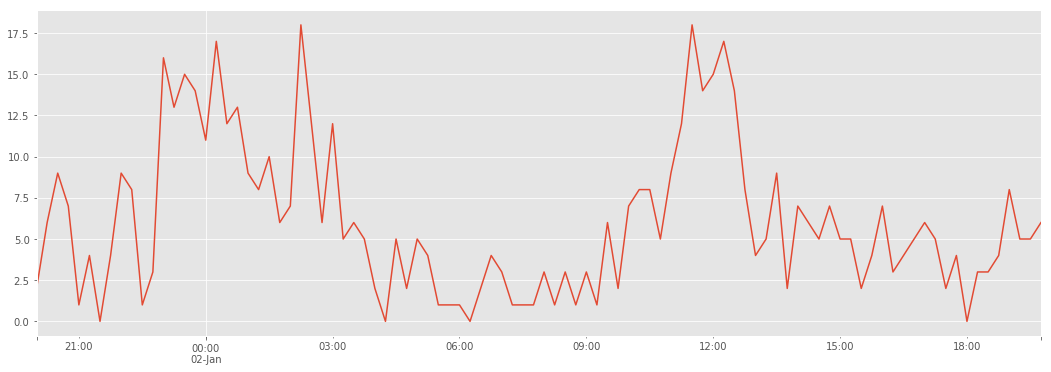

In [14]:
#plot one day's data
plt.figure(figsize = (18,6))
ts[0:96].plot()

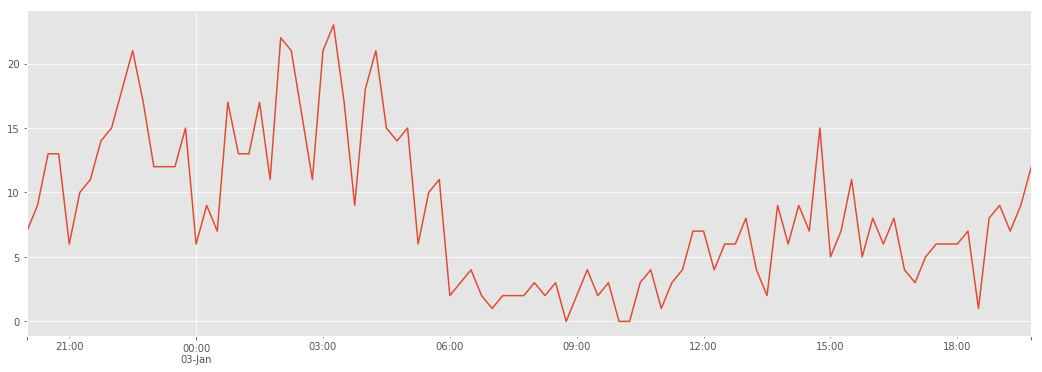

In [15]:
# plot second day's data
plt.figure(figsize = (18,6))
ts[96:192].plot()

The data peaks every 12 hours.

In [16]:
ts.max()

73.0

In [17]:
ts[ts==73].index[0].dayofweek

6

The overall peak happens on a Sunday. 

In [18]:
len(ts)/96/7

14.566964285714286

In [19]:
for i in range(14):
    print(ts[ts == ts[i*96*7:(i+1)*96*7].max()].index[0].dayofweek)

6
6
6
6
6
5
6
6
6
6
4
5
2
5


For initial two months, the peak happens on weekends, mostly Sunday. But, in the third month the pattern changes.


There is one issue with data. The login_times are randomly organized.

Part 2 ‐ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is 
most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity 
in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to 
each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver 
partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both 
cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation 
to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both 
cities, and why would you choose this metric?


I would like to use number of toll booth reimbursements per driver partner during the weekend as a measure of success.
We have observed that there are more user logins in weekends. The activities are reasonably distributed between two 
cities during weekend. Whereas, during weekdays, Ultimate Metropolis is active during the day and Ultimate Gotham
is active during night. It would be very difficult for driver partners to cover both cities during weekdays as 
they will have to work for more than 12 hours.

--  2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation 
to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.



a. I will measure total number of riders during weekends for driver partners before and after the implememntation of
toll fee reimbursement.


b. The Null hypothesis will be : There is no difference in riders before and after toll fee reimbursement


c. If the null hypothesis is rejected; we will make the policy implementation permanent.


Part3

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [20]:
# load as Pandas dataframe
with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
ultimate_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [23]:
ultimate_df[['signup_date','last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18,2014-06-29
freq,2948,2036


In [24]:
ultimate_df['last_trip_date'][0]

'2014-06-17'

In [25]:
# Check sign up date of an user
# Find the date 6 months later
# Find the date 5 months later
# If user last trip date is between the above two dates, user was retained in the sixth month
retained_users = []
for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i])
    et = st + pd.Timedelta('181D')
    at = et - pd.Timedelta('30D')
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        retained_users.append([1])
    else:
        retained_users.append([0])

In [26]:
df1 = pd.DataFrame(retained_users,columns = ['retained_users'])

In [27]:
df1['retained_users'].mean()

0.24396

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
retained_users    50000 non-null int64
dtypes: int64(1)
memory usage: 390.7 KB


24% of observed users were retained on the sixth month

In [31]:
ultimate_merge_df = pd.concat([ultimate_df.reset_index(drop=True),df1.reset_index(drop=True)], axis=1)
ultimate_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained_users            50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [32]:
ultimate_merge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_users
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


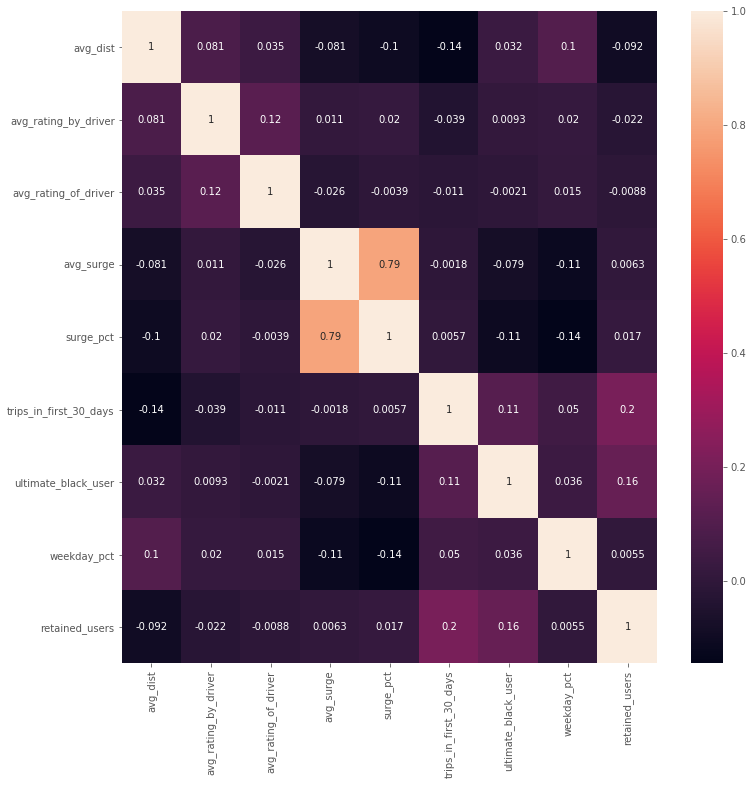

In [33]:
# What are the correlations between all columns?
plt.figure(figsize=(12,12))
#del df['ID']
sns.heatmap(ultimate_merge_df.corr(), annot =True)
plt.show()

The following features impact the retention of users:
1. Average Distance (avg_dist): Negative impact: More the average distance, less is the chance of retention of the user. Very weak correlation.
2. Trips in first 30 days (trips_in_first_30_days). Positive impact: More trip in first 30 days, better the chance of retention. Moderately strong correlation.
3. Ultimate black user(ultimate_black_user): Positive impact. Moderately strong correlation.
4. Average rating by driver (avg_rating_by_driver): Negative impact: Very weak correlation


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
retained_users    50000 non-null int64
dtypes: int64(1)
memory usage: 390.7 KB


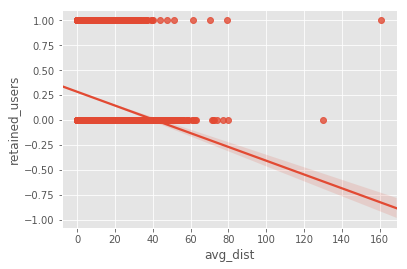

In [35]:
sns.regplot(y = 'retained_users', x = 'avg_dist', data = ultimate_merge_df )

In [36]:
# We will drop the features which have no impact
ultimate_merge_df = ultimate_merge_df.drop(['avg_rating_of_driver', 'avg_surge','surge_pct','last_trip_date','signup_date','weekday_pct'], axis = 1)
ultimate_merge_df.head()

,avg_dist,avg_rating_by_driver,city,phone,trips_in_first_30_days,ultimate_black_user,retained_users
0,3.67,5.0,King's Landing,iPhone,4,True,0
1,8.26,5.0,Astapor,Android,0,False,0
2,0.77,5.0,Astapor,iPhone,3,False,0
3,2.36,4.9,King's Landing,iPhone,9,True,1
4,3.13,4.9,Winterfell,Android,14,False,0


Let's check the categorical variables now - City and phone

In [38]:
# Table of City vs Retained users
city_active = pd.crosstab(index=ultimate_merge_df["retained_users"], 
                            columns=ultimate_merge_df["city"],
                             margins=True)   # Include row and column totals

city_active.columns = ["Astapor","King's Landing",'Winterfell',"rowtotal"]
city_active.index= ["Not Active","Is Active","coltotal"]

city_active

,Astapor,King's Landing,Winterfell,rowtotal
Not Active,13838,6099,17865,37802
Is Active,2696,4031,5471,12198
coltotal,16534,10130,23336,50000


City seems to a feature with some impact as especially Astapor and King's Landing have ratios outside of the standard active/not active rate.

In [39]:
# Table of phone type vs active
phone_active = pd.crosstab(index=ultimate_merge_df["retained_users"], 
                            columns=ultimate_merge_df["phone"],
                             margins=True)   # Include row and column totals

phone_active.columns = ["Android","iPhone","rowtotal"]
phone_active.index= ["Not Active","Is Active","coltotal"]

phone_active

,Android,iPhone,rowtotal
Not Active,13096,24394,37490
Is Active,1926,10188,12114
coltotal,15022,34582,49604


Building a predictive model

In [40]:
# Transforming categorical varibles before using sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing",'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])


LabelEncoder()

In [41]:
ultimate_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
retained_users            50000 non-null int64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [42]:
df_drop = ultimate_merge_df.dropna()

In [43]:
df_drop['retained_users'].value_counts()

0    37314
1    12092
Name: retained_users, dtype: int64

After dropping null values, the ratio of retained users have increased from 24.39% to 24.47%
I will go ahead and drop the missing values.

In [44]:
df = ultimate_merge_df.dropna()
df = df.reset_index(drop = True)

In [45]:
#transform the categorical data into number labels
city = le.transform(df['city']) 
phone = LE.transform(df['phone'])

In [50]:
df2 =  pd.DataFrame(city, columns =['city#'])
df3 =  pd.DataFrame(phone, columns =['phone#'])
df = pd.concat([df,df2,df3],axis =1 )
len(df)

49406

In [51]:
df = df.drop(['city','phone'], axis=1)

In [52]:
#final cleaning step - change true/false labels to 1/0's. #final c 
UB = []
for i in range(len(df)):
    if df['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
df4 = pd.DataFrame(UB,columns = ['UB'])
df4.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [53]:
df = pd.concat([df,df4],axis =1 )
# drop the old columns
df = df.drop(['ultimate_black_user'], axis=1) 
df.head()

,avg_dist,avg_rating_by_driver,trips_in_first_30_days,retained_users,city#,phone#,city#,phone#,UB
0,3.67,5.0,4,0,1,1,1,1,1
1,8.26,5.0,0,0,0,0,0,0,0
2,0.77,5.0,3,0,0,1,0,1,0
3,2.36,4.9,9,1,1,1,1,1,1
4,3.13,4.9,14,0,2,0,2,0,0


In [55]:
#splitting into features and target
y = df['retained_users']
X = df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','UB']]

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 42)
#create the classifier logreg
logreg = LogisticRegression()
# Fit the ckassifier to the training data
logreg.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14629   329]
 [ 4278   527]]
             precision    recall  f1-score   support

          0       0.77      0.98      0.86     14958
          1       0.62      0.11      0.19      4805

avg / total       0.74      0.77      0.70     19763



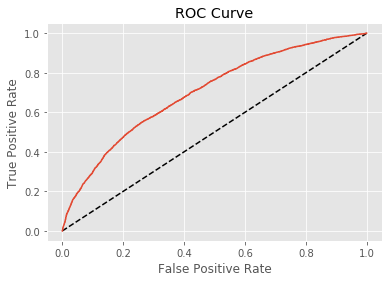

In [58]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7014971298755488
AUC scores computed using 5-fold cross-validation: [ 0.70164156  0.69688329  0.69419032  0.70067395  0.70837146]


In [59]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.7665668137473182


In [63]:
# make predictions for test data
from sklearn.metrics import accuracy_score
y_pred = logreg_cv.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.72%


Conclusion:

First I tried to figure out pattern of user activity in weekdays and weekends. I found some clear pattern of peaking every 12 hours.

Then I tried to design a statistical hypothesis and experiement to implement policy of toll fee reimbursement.

And lastly I built a model to predict whether a user will be retained after six months or not. I looked at all features that can be used to build a logistic regression model. I carefully selected only a features to be used for the logistic regression. My logistic regression model is almost 77% accurate and I could achieve area under the curve of 0.7.

